In [1]:
import pandas as pd
hr = pd.read_csv('HR_DataSet.csv')

In [2]:
hr=hr.rename(columns = {'dep':'department'})

We have 2363 employees and 10 features

In [3]:
hr.shape

(2363, 10)

describe() method will give us some basic summary about our dataset

In [4]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000
mean,0.475493,0.719073,3.862886,205.647905,3.761320,0.067711,0.846382,0.003386
std,0.271925,0.192578,1.719241,59.358442,1.021651,0.251302,0.360659,0.058099
min,0.090000,0.360000,2.000000,97.000000,2.000000,0.000000,0.000000,0.000000
25%,0.350000,0.530000,2.000000,147.000000,3.000000,0.000000,1.000000,0.000000
50%,0.430000,0.770000,4.000000,217.000000,3.000000,0.000000,1.000000,0.000000
75%,0.750000,0.900000,5.000000,259.000000,5.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000,1.000000


In [5]:
print(hr['department'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


## Data Exploration

how many employees had got left?

In [6]:
hr['left'].value_counts()

1    2000
0     363
Name: left, dtype: int64

The average satisfaction level of employees who stayed with the company is higher than that of the employees who left.

In [7]:
hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.671295,0.708375,3.785124,193.162534,3.118457,0.151515,0.000
1,0.439955,0.721015,3.877000,207.914000,3.878000,0.052500,0.004


We observe the same data grouped by department

In [8]:
hr.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
IT,0.465397,0.713915,3.846561,207.835979,3.714286,0.068783,0.841270,0.010582
RandD,0.471091,0.724818,3.963636,210.490909,3.800000,0.100000,0.781818,0.000000
accounting,0.456822,0.720078,3.875969,206.325581,3.728682,0.038760,0.852713,0.000000
hr,0.468872,0.687143,3.556391,196.421053,3.661654,0.045113,0.849624,0.000000
management,0.467541,0.735082,3.983607,205.426230,3.590164,0.065574,0.852459,0.016393
marketing,0.491250,0.702656,3.679688,199.632812,3.750000,0.054688,0.875000,0.000000
product_mng,0.496231,0.718692,3.838462,202.446154,3.815385,0.092308,0.846154,0.000000
sales,0.474799,0.709877,3.745370,203.501543,3.723765,0.066358,0.858025,0.004630
support,0.488949,0.730836,3.948787,204.614555,3.814016,0.080863,0.840970,0.002695


We observe the same data grouped by Salary

In [9]:
hr.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.479825,0.695789,3.824561,199.192982,3.649123,0.017544,0.842105,0.000000
low,0.478475,0.719129,3.838849,204.989209,3.756835,0.064748,0.850360,0.003597
medium,0.470699,0.720437,3.901747,207.049127,3.775109,0.075328,0.840611,0.003275


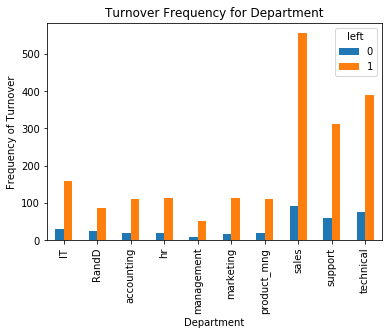

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(hr.department,hr.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

In [11]:
hr.shape

(2363, 10)

In [12]:
pd.crosstab(hr.department, hr.left)

left,0,1
department,,
IT,30,159
RandD,24,86
accounting,19,110
hr,20,113
management,9,52
marketing,16,112
product_mng,20,110
sales,92,556
support,59,312


### Create dummy variables for categorical variables

There are two categorical variables in the dataset and they need to be converted to dummy variables before they can be used for modelling.

In [13]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [14]:
hr.shape

(2363, 23)

The Department and Salary variables needs to be removed

In [15]:
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)

In [16]:
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_IT',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_high', 'salary_low',
       'salary_medium'], dtype=object)

In [17]:
hr.shape

(2363, 21)

In [18]:
hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]

In [19]:
X

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department_IT',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_support',
 'department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(hr[X], hr[y])
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False  True  True  True False  True False False  True
  True False False False False  True False False]
[ 1  1  1 11  1  1  1  6  1  7 10  1  1  9  5  4  8  1  2  3]


In [23]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 
X=hr[cols]
y=hr['left']

### Logistic regression model

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.918


### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.932


### Support Vector Machine

In [29]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.925


Random forest won, right?

In [31]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.929


### Precision and recall

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       108
           1       0.96      0.96      0.96       601

   micro avg       0.93      0.93      0.93       709
   macro avg       0.87      0.87      0.87       709
weighted avg       0.93      0.93      0.93       709



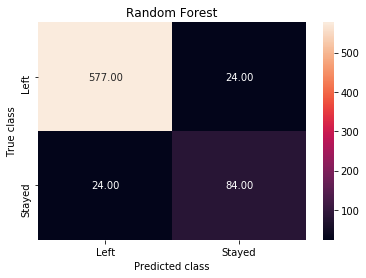

In [33]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [34]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.53      0.66       108
           1       0.92      0.99      0.95       601

   micro avg       0.92      0.92      0.92       709
   macro avg       0.91      0.76      0.81       709
weighted avg       0.92      0.92      0.91       709



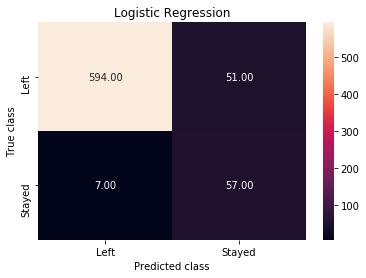

In [35]:
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

In [36]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.59      0.71       108
           1       0.93      0.99      0.96       601

   micro avg       0.93      0.93      0.93       709
   macro avg       0.90      0.79      0.83       709
weighted avg       0.92      0.93      0.92       709



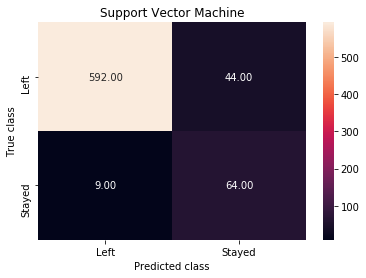

In [37]:
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

When an employee left, how often does my classifier predict that correctly? This measurement is called "recall"

When a classifier predicts an employee will leave, how often does that employee actually leave? This measurement is called "precision".

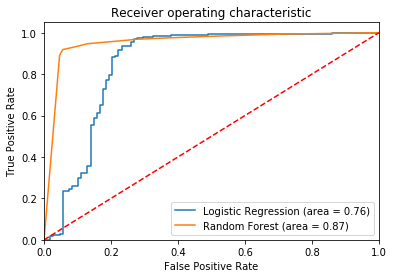

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [40]:
import numpy as np

In [41]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

promotion_last_5years-0.16%
salary_high-0.29%
department_RandD-0.62%
department_management-0.79%
department_hr-1.03%
Work_accident-1.46%
salary_low-2.15%
last_evaluation-22.64%
satisfaction_level-34.87%
time_spend_company-35.97%
